In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [271]:
df = pd.read_csv("course_lead_scoring.csv")

In [272]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [273]:
df.columns= df.columns.str.lower().str.replace(" ","_")
categorical_columns =list(df.dtypes[df.dtypes== "object"].index)
numerical_columns =list(df.dtypes[df.dtypes!= "object"].index)
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [274]:
numerical_columns= ['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [275]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    df[c] = df[c].fillna("NA")

In [276]:
for c in numerical_columns:
    df[c] = df[c].fillna(0.0)

In [370]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [278]:
df["converted"]

0       1
1       0
2       1
3       0
4       1
       ..
1457    1
1458    1
1459    1
1460    1
1461    1
Name: converted, Length: 1462, dtype: int64

In [339]:
df_full_train, df_test= train_test_split(df, test_size=0.2, random_state=1)
df_train,df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train["converted"]
del df_val["converted"]
del df_test["converted"]

In [340]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [341]:
def train(df_train,y_train,C=1.0):
    dicts=df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train=dv.fit_transform(dicts)
    model.fit(X_train,y_train)
    return model

In [342]:
df_train[[x]]

KeyError: "None of [Index([(0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, ...)], dtype='object')] are in the [columns]"

In [343]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
for x in numerical_columns:
    model=train(df_train[[x]],y_train)
    y_pred = model.predict_proba(df_train[[x]])[:, 1]
    print(x)
    print(roc_auc_score(y_train,y_pred))
    df_final=tpr_fpr_dataframe(y_train,y_pred)
    print(auc(df_final.fpr, df_final.tpr))

number_of_courses_viewed
0.7635680590007088
0.7635680590007087
annual_income
0.5519578313253012
0.5521045579376329
interaction_count
0.738270176293409
0.738270176293409
lead_score
0.6144993577250176
0.6138238616229624


C:\Users\emahc\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\emahc\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\emahc\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\emahc\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [344]:
df_final

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,544,332,0,0,1.0,1.0
1,0.01,544,332,0,0,1.0,1.0
2,0.02,544,332,0,0,1.0,1.0
3,0.03,544,332,0,0,1.0,1.0
4,0.04,544,332,0,0,1.0,1.0
...,...,...,...,...,...,...,...
96,0.96,0,0,544,332,0.0,0.0
97,0.97,0,0,544,332,0.0,0.0
98,0.98,0,0,544,332,0.0,0.0
99,0.99,0,0,544,332,0.0,0.0


In [345]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_columns+numerical_columns].to_dict(orient="records")
X_train=dv.fit_transform(train_dict)
model2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [346]:
val_dict = df_val[categorical_columns+numerical_columns].to_dict(orient="records")

X_val=dv.transform(val_dict)
y_val_pred= model2.predict_proba(X_val)[:, 1]

In [347]:
print(roc_auc_score(y_val,y_val_pred))
df_final=tpr_fpr_dataframe(y_val,y_val_pred)
print(auc(df_final.fpr, df_final.tpr))

0.8171316268814112
0.8161969130476464


In [348]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sclaed=scaler.fit_transform(X_train)

In [349]:
model2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model2.fit(x_train_sclaed, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [350]:
val_dict = df_val[categorical_columns+numerical_columns].to_dict(orient="records")

X_val=dv.transform(val_dict)
x_val_sclaed=scaler.transform(X_val)
y_val_pred= model2.predict_proba(x_val_sclaed)[:, 1]
print(roc_auc_score(y_val,y_val_pred))
df_final=tpr_fpr_dataframe(y_val,y_val_pred)
print(auc(df_final.fpr, df_final.tpr))

0.9208608954079187
0.9207170932796471


In [351]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_columns+numerical_columns].to_dict(orient="records")
X_train=dv.fit_transform(train_dict)
model3 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model3.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [352]:
def pr_re_f1_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['pr'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['re'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['f1'] = 2 * ((df_scores.pr*df_scores.re)/(df_scores.pr+df_scores.re)) 
    return df_scores

In [353]:
val_dict = df_val[categorical_columns+numerical_columns].to_dict(orient="records")

X_val=dv.transform(val_dict)
y_val_pred = model3.predict_proba(X_val)[:, 1]
df_scores=pr_re_f1_dataframe(y_val,y_val_pred)

Text(0.64, 0.7790697674418605, '(0.64, 0.78)')

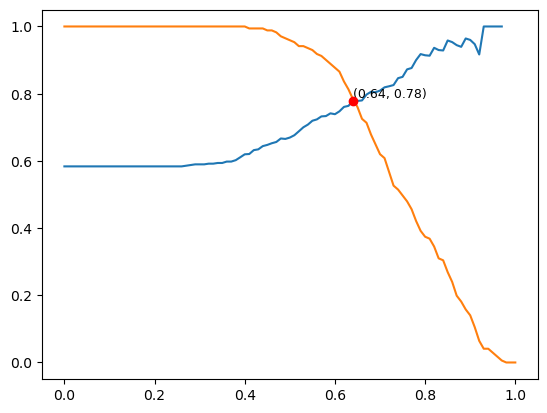

In [354]:
x=df_scores.threshold
y1=df_scores.pr
y2=df_scores.re

diff= np.abs(y1-y2)
i=diff.idxmin()
plt.plot(x, y1, label='Precision')
plt.plot(x, y2, label='Recall')

plt.scatter(x[i],y1[i],color="red",zorder=5,label="Intersection")
plt.text(x[i],y1[i], f"({x[i]:.2f}, {y1[i]:.2f})", fontsize=9, ha='left', va='bottom')

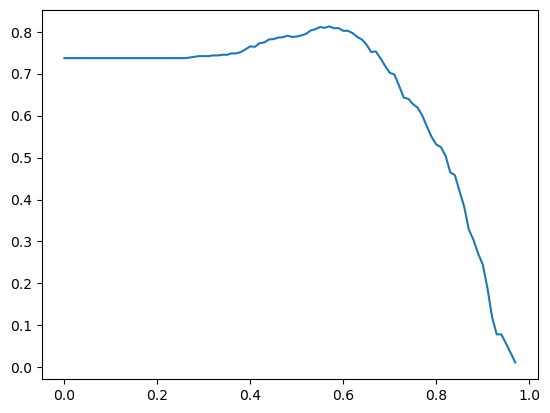

In [357]:
plt.plot(df_scores.threshold,df_scores.f1)


In [358]:
df_scores[10:60]

,threshold,tp,fp,fn,tn,pr,re,f1
10,0.10,171,122,0,0,0.583618,1.000000,0.737069
11,0.11,171,122,0,0,0.583618,1.000000,0.737069
12,0.12,171,122,0,0,0.583618,1.000000,0.737069
13,0.13,171,122,0,0,0.583618,1.000000,0.737069
14,0.14,171,122,0,0,0.583618,1.000000,0.737069
15,0.15,171,122,0,0,0.583618,1.000000,0.737069
16,0.16,171,122,0,0,0.583618,1.000000,0.737069
17,0.17,171,122,0,0,0.583618,1.000000,0.737069
18,0.18,171,122,0,0,0.583618,1.000000,0.737069
19,0.19,171,122,0,0,0.583618,1.000000,0.737069


In [361]:
from tqdm.auto import tqdm

In [369]:
n_splits = 5
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns+numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C,solver='liblinear',  max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
def predict(df, dv, model):
    dicts = df[categorical_columns+numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
from sklearn.model_selection import KFold
for C in tqdm([ 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/1 [00:00<?, ?it/s]

C=1 0.822 +- 0.036


In [371]:
n_splits = 5
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns+numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C,solver='liblinear',  max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
def predict(df, dv, model):
    dicts = df[categorical_columns+numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
from sklearn.model_selection import KFold
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
